In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train.astype('float32')/255., x_test.astype('float32')/255.

4422102/4422102 [==============================] - 0s 0us/step


In [12]:
class ConvAE(Model):
    def __init__(self, latent_dim):
        super(ConvAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(28,28,1)),
            layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'),
            layers.Flatten(),
            layers.Dense(latent_dim)
        ])
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(28*28*32),
            layers.Reshape(target_shape=(28,28,32)),
            layers.Conv2DTranspose(filters=1,kernel_size=(3,3),strides=(1,1),padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [14]:
cae = ConvAE(64)
cae.compile(optimizer='adam',loss=losses.MeanSquaredError())
cae.fit(x_train, x_train, epochs=2, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/2
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0140 - val_loss: 0.0109
Epoch 2/2
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0108 - val_loss: 0.0107


**NOTE:** This is just to show how to use Convolutional layers to create an AutoEncoder. If you want to get better results, try adding more layers or changing hyper-parameters such as batch_size/epochs/filters/kernels, etc.

In [15]:
encoded_imgs = cae.encoder(x_test).numpy()
decoded_imgs = cae.decoder(encoded_imgs).numpy()

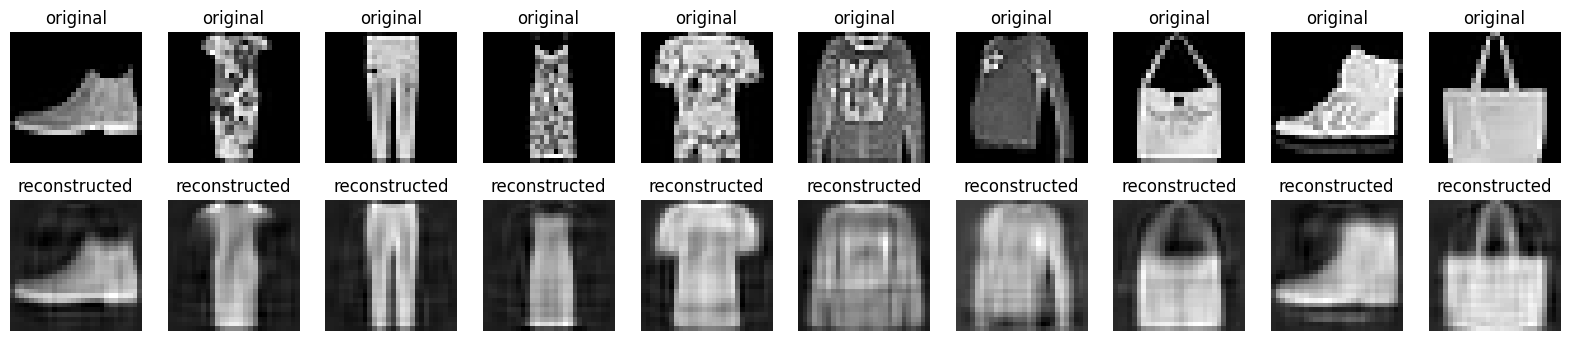

In [16]:
plt.figure(figsize=(20,4))
for i in range(10):
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[100*i])
    plt.title('original')
    plt.gray()
    plt.axis('off')

    ax = plt.subplot(2,10,10+i+1)
    plt.imshow(decoded_imgs[100*i])
    plt.title('reconstructed')
    plt.gray()
    plt.axis('off')
plt.show()